# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [53]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [64]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train
lr = 0.01        # learning rate

In [83]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)



Files already downloaded and verified
Files already downloaded and verified


Code for 1(a)

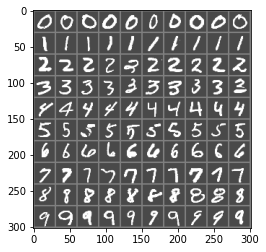

In [56]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataviz = torch.zeros([100, 1, 28, 28])
batch_size = 1
dataiter=iter(train_loader)

for i in range(10):
    count = 0
    while count < 10:
        images, labels = dataiter.next()
        if labels[0] == i:
            dataviz[10*i+count] = images[0]
            count += 1

# show images
imshow(torchvision.utils.make_grid(dataviz,nrow=10))


1(b)

Files already downloaded and verified
Files already downloaded and verified


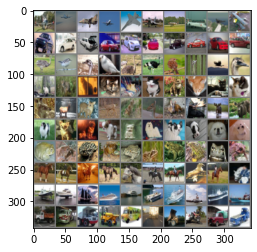

In [59]:
dataset = 'mnist'

if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

dataviz = torch.zeros([100, 3, 32, 32])
batch_size = 1
dataiter=iter(train_loader)

for i in range(10):
    count = 0
    while count < 10:
        images, labels = dataiter.next()
        if labels[0] == i:
            dataviz[10*i+count] = images[0]
            count += 1

# show images
imshow(torchvision.utils.make_grid(dataviz,nrow=10))

In [66]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [75]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


2(A)

In [68]:
train(1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.530006
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.826194
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.513767
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.379356
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.635530
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.440173
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.603654
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.485593
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.299970
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.324966


In [69]:
test()


Test set: Average loss: 0.3365, Accuracy: 9056/10000 (91%)



2(B)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.340097
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.235685
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.262934
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.362287
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.463173
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.227011
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.241392
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.275402
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.260286
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.256972
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.480542
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.267616
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.322096
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.248270
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.206869
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.204503
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.215363
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.397863
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.157818
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.429296
Train Epoch:

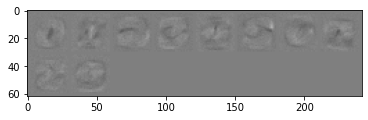

In [70]:
for epoch in range(2,epochs+1):
  train(epoch)

test()
imshow(torchvision.utils.make_grid(network.state_dict()['linear.weight'].reshape((10,1,28,28))))

# 2(C) (difficulty finding the right enumeration to do only 50 samples)

In [73]:
batch_size = 50
sampleiter = iter(train_loader)
sample50 = sampleiter.next()


def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(sample50):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [74]:
train(1)

ValueError: ignored

3(A)

In [80]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(num_inputs, 1000)
        self.linear2 = nn.Linear(1000,num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        input = self.linear1(input)
        output = F.tanh(self.linear2(input))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [77]:
for epoch in range(1,11):
  train(epoch)

test()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.363370
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.339615
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.207478
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.141828
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.081260
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.036031
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.120752
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.090124
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.063358
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.989124
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.043039
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.973519
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.001446
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.074426
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.973151
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.051677
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.993439
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.096539
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.138314
Train Epoch: 2 [57600/60000 (96%)]	Loss: 1.152013
Train Epoch:

3(B) : when you set the learning rate to 10, then the loss has trouble converging because the steps are too large during the training

In [81]:
lr = 10
for epoch in range(1,5):
  train(epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308808
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.708058
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.568292
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.481886
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.193537
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.402214
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.149556
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.586192
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.274514
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.339720
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.634474
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.318713
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.314825
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.443545
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.457341
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.313882
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.149494
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.358377
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.138818
Train Epoch: 2 [57600/60000 (96%)]	Loss: 2.497761
Train Epoch:

4(A)

In [89]:
dataset = 'cifar10'
lr = 0.01
batch_size = 64

In [94]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size = 5)
        self.conv2 = nn.Conv2d(16,128,kernel_size = 5)
        self.linear1 = nn.Linear(3200, 60)
        self.linear2 = nn.Linear(60,num_outputs)

    def forward(self, input):
        input = F.max_pool2d(F.tanh(self.conv1(input)),2) # reshape input to batch x num_inputs
        input = F.max_pool2d(F.tanh(self.conv2(input)),2)
        input = torch.flatten(input,1)
        input = F.tanh(self.linear1(input))
        output = self.linear2(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

4(B)  I had to kill this training early due to time, but this is what it looked like about a third of the way through

Test set: Average loss: 1.1892, Accuracy: 5773/10000 (58%)

In [95]:
for epoch in range(1,21):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.320614
Train Epoch: 1 [5000/50000 (10%)]	Loss: 2.122525
Train Epoch: 1 [10000/50000 (20%)]	Loss: 2.005091
Train Epoch: 1 [15000/50000 (30%)]	Loss: 2.143604
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.902594
Train Epoch: 1 [25000/50000 (50%)]	Loss: 1.855452
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.992258
Train Epoch: 1 [35000/50000 (70%)]	Loss: 1.903072
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.797986
Train Epoch: 1 [45000/50000 (90%)]	Loss: 1.824357

Test set: Average loss: 1.7219, Accuracy: 3965/10000 (40%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.813276
Train Epoch: 2 [5000/50000 (10%)]	Loss: 1.831288
Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.843771
Train Epoch: 2 [15000/50000 (30%)]	Loss: 1.771559
Train Epoch: 2 [20000/50000 (40%)]	Loss: 1.678664
Train Epoch: 2 [25000/50000 (50%)]	Loss: 1.761926
Train Epoch: 2 [30000/50000 (60%)]	Loss: 1.676325
Train Epoch: 2 [35000/50000 (70%)]	Loss: 1.524136
Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.474517
T

KeyboardInterrupt: ignored

4(C) The Parameters can be broken down by layer, the first convolution layer outputting 16 channels with a 5x5 convolution for 400 parameters.  The next convolution layer has 128 channels, also with a 5x5 filter, so that layer has 3200 parameters.  Finally we have the linear layers, with 60 and 10 hidden layers, which are the number of parameters respectively for those layers.  This brings the final total to 3670 parameters. 